### **UMAP Analysis**

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import KMeans
from config_paths import FEATURE_DATA_PKL

In [8]:
with open(FEATURE_DATA_PKL, 'rb') as f:
    feature_data = pickle.load(f)

In [9]:
# UMAP (3D)
def run_umap(data, n_components=3, n_neighbors=15, min_dist=0.1, random_state=42):
    """
    Run UMAP dimensionality reduction (3D by default) and return the embedding.
    """
    reducer = umap.UMAP(
        n_components=n_components,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=random_state
    )
    return reducer.fit_transform(data)


# Elbow Method to Find Optimal k
def find_optimal_clusters(data, max_k=50):
    """
    Plot the inertia curve for k in [2, max_k] and prompt the user to pick k.
    Returns the chosen k as an int.
    """
    inertia = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia, marker='o', linestyle='--')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
    plt.title("Elbow Method for Optimal k")
    plt.show()

    # Choose elbow visually or enter manually
    optimal_k = int(input("Enter the best k from the elbow graph: "))
    return optimal_k


def cluster_kmeans(data, n_clusters):
    """
    Fit KMeans with n_clusters and return the cluster labels.
    """
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    return kmeans.fit_predict(data)


# 3D Plot
def plot_3d_clusters(data, labels, title):
    """
    Render a 3D scatter plot of the (N, 3) embedding colored by cluster labels.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        data[:, 0], data[:, 1], data[:, 2],
        c=labels, cmap='Spectral', s=5, alpha=0.6
    )

    ax.set_title(title)
    ax.set_xlabel("UMAP Dimension 1")
    ax.set_ylabel("UMAP Dimension 2")
    ax.set_zlabel("UMAP Dimension 3")
    fig.colorbar(scatter, ax=ax, label="Cluster Label")

    # Default viewing angle
    ax.view_init(elev=30, azim=45)

    plt.show()


def main(mode, optimal_k=None):
    """
    Pipeline:
      1) Extract feature vectors for the given mode from `feature_data`.
      2) Reduce to 3D via UMAP.
      3) Determine k (elbow or provided).
      4) Cluster with KMeans.
      5) Plot the 3D result.
    """
    # Extract Features
    features = np.array([entry[mode] for entry in feature_data])
    umap_3d = run_umap(features)

    # Determine k and Run KMeans
    if optimal_k is None:
        optimal_k = find_optimal_clusters(umap_3d)

    labels_3d = cluster_kmeans(umap_3d, optimal_k)

    # 3D Plot with optimized K-value
    plot_3d_clusters(
        umap_3d, labels_3d,
        title=f"3D UMAP with KMeans on {mode} (k={optimal_k})"
    )


c:\Users\TUFA17\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


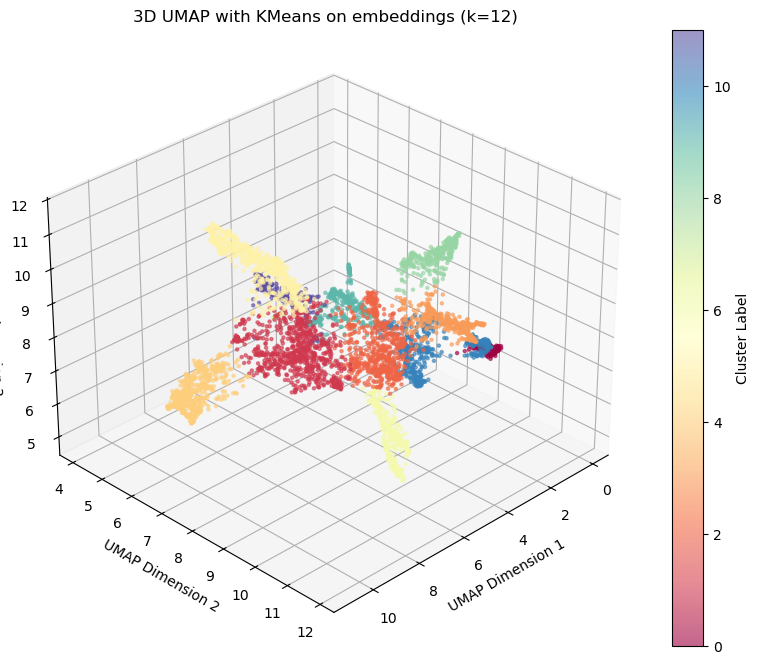

In [10]:
main("embeddings", optimal_k=12)

c:\Users\TUFA17\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


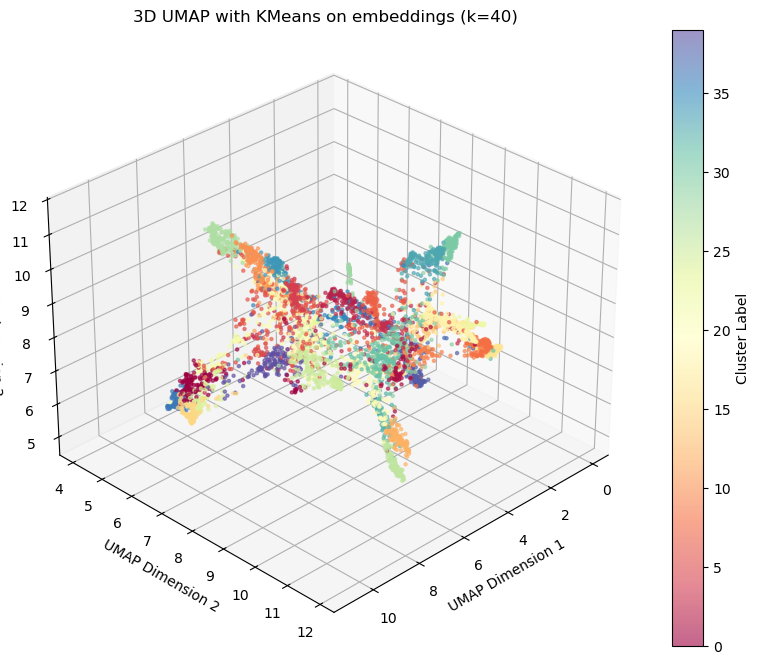

In [11]:
def main(mode, optimal_k=None):
    # Collect feature vectors for the selected mode
    features = np.array([entry[mode] for entry in feature_data])

    # Cluster in original feature space (uses provided k)
    labels_3d = cluster_kmeans(features, optimal_k)

    # Reduce to 3D with UMAP (for visualization)
    umap_3d = run_umap(features)

    # Visualize clusters on the 3D UMAP embedding
    plot_3d_clusters(
        umap_3d, labels_3d,
        title=f"3D UMAP with KMeans on {mode} (k={optimal_k})"
    )

main("embeddings", 40)

c:\Users\TUFA17\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


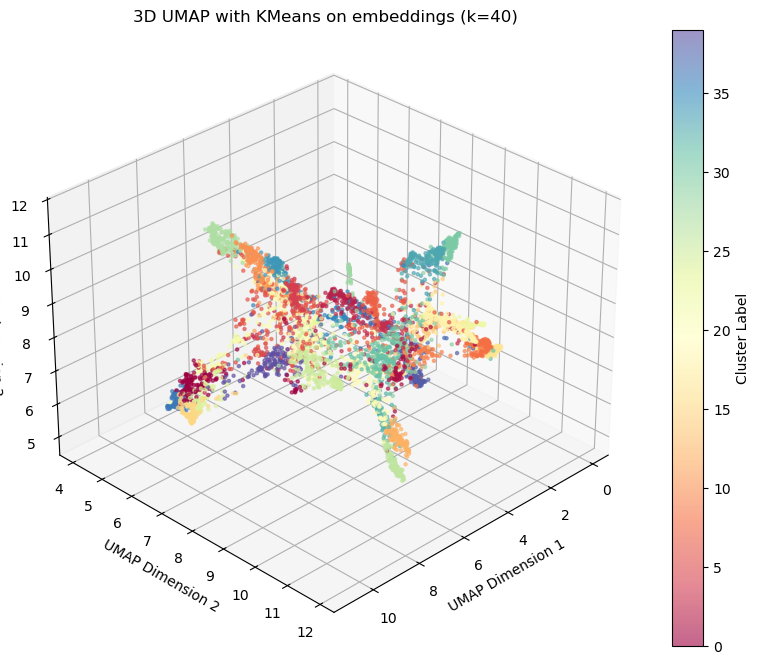

In [12]:
def main(mode, optimal_k=None):
    # Gather feature vectors for the selected mode
    features = np.array([entry[mode] for entry in feature_data])

    # Cluster directly in feature space (using provided k)
    labels_3d = cluster_kmeans(features, optimal_k)

    # Reduce features to 3D with UMAP for visualization
    umap_3d = run_umap(features)

    # Plot clusters on the 3D UMAP embedding
    plot_3d_clusters(
        umap_3d, labels_3d,
        title=f"3D UMAP with KMeans on {mode} (k={optimal_k})"
    )

main("embeddings", 40)